In [1]:
import geopandas as gpd
#version 0.4.1
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.patches as mpatches
#matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.style.use('seaborn-white')
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['axes.titleweight']= 'bold'

#plt.rcParams['lines.markeredgecolor']= 'black'
plt.rcParams['figure.titleweight'] = 'bold'
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import scipy as sp

In [2]:
shapefile = 'NUTS_Level_2_January_2018_Full_Clipped_Boundaries_in_the_United_Kingdom/NUTS_Level_2_January_2018_Full_Clipped_Boundaries_in_the_United_Kingdom.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)
gdf = gdf.to_crs({'init': 'epsg:3395'}) #Mercator scale
gdf.head()

,objectid,nuts218cd,nuts218nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,UKC1,Tees Valley and Durham,414643,532242,-1.77440,54.685020,3.026249e+09,487438.014517,(POLYGON ((-193365.6979340445 7311064.18107926...
1,2,UKC2,Northumberland and Tyne and Wear,398898,602530,-2.01892,55.316841,5.566181e+09,751311.485119,(POLYGON ((-225327.5089228939 7477640.77805066...
2,3,UKD1,Cumbria,341868,527389,-2.90218,54.638260,6.822195e+09,987066.701024,(POLYGON ((-297845.3854653973 7360474.64982703...
3,4,UKD3,Greater Manchester,377940,401102,-2.33407,53.506149,1.275981e+09,248705.119145,POLYGON ((-237360.5331521469 7076090.247206025...
4,5,UKD4,Lancashire,363669,441026,-2.55392,53.864182,3.076413e+09,795004.920936,(POLYGON ((-273750.3394512442 7180423.90122988...


In [3]:
df = pd.read_csv("NUTS2_to_nu_clusters_regions.txt",sep='\t')
df.head()

,NUTS2,NU_CL,Colors
0,UKC1,North East and West,#d55e00
1,UKC2,North East and West,#d55e00
2,UKD1,North East and West,#d55e00
3,UKD3,"Yorkshire, North West",#cc79a7
4,UKD4,"Yorkshire, North West",#cc79a7


In [4]:
merged = gdf.merge(df,left_on='nuts218cd',right_on='NUTS2')

In [5]:
merged.head()

,objectid,nuts218cd,nuts218nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,NUTS2,NU_CL,Colors
0,1,UKC1,Tees Valley and Durham,414643,532242,-1.77440,54.685020,3.026249e+09,487438.014517,(POLYGON ((-193365.6979340445 7311064.18107926...,UKC1,North East and West,#d55e00
1,2,UKC2,Northumberland and Tyne and Wear,398898,602530,-2.01892,55.316841,5.566181e+09,751311.485119,(POLYGON ((-225327.5089228939 7477640.77805066...,UKC2,North East and West,#d55e00
2,3,UKD1,Cumbria,341868,527389,-2.90218,54.638260,6.822195e+09,987066.701024,(POLYGON ((-297845.3854653973 7360474.64982703...,UKD1,North East and West,#d55e00
3,4,UKD3,Greater Manchester,377940,401102,-2.33407,53.506149,1.275981e+09,248705.119145,POLYGON ((-237360.5331521469 7076090.247206025...,UKD3,"Yorkshire, North West",#cc79a7
4,5,UKD4,Lancashire,363669,441026,-2.55392,53.864182,3.076413e+09,795004.920936,(POLYGON ((-273750.3394512442 7180423.90122988...,UKD4,"Yorkshire, North West",#cc79a7


In [6]:
subhaplo = pd.read_csv('subhaplo_to_UK_region_mod2.txt',sep='\t')

In [7]:
subhaplo.head()

,Macrohaplo,NU_CL,Subhaplogroup,Count,N,Fraction
0,H,"Midlands,London,South East and West",H1,16030,148954,0.107617
1,H,"Midlands,London,South East and West",H1b,3350,148954,0.022490
2,H,"Midlands,London,South East and West",H2a,19374,148954,0.130067
3,H,"Midlands,London,South East and West",H3,5336,148954,0.035823
4,H,"Midlands,London,South East and West",H4a,2950,148954,0.019805


In [8]:
df = pd.pivot_table(subhaplo,columns="Subhaplogroup",values="Fraction",index=["NU_CL",'Macrohaplo'],fill_value=0).reset_index()

In [9]:
#dataframes per UK region
midlands = df[df['NU_CL']=='Midlands,London,South East and West']
midlands = midlands[midlands.columns[1:]]
wales = df[df['NU_CL']=='Wales']
wales = wales[wales.columns[1:]]
scotland = df[df['NU_CL']=='Scotland']
scotland = scotland[scotland.columns[1:]]
north=df[df['NU_CL']=='Yorkshire, North West']
north = north[north.columns[1:]]
yorkshire = df[df['NU_CL']=='Yorkshire, North West']
yorkshire = yorkshire[yorkshire.columns[1:]]

In [10]:
midlands[midlands['Macrohaplo']=='I'].values

array([['I', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008049464935483438,
        0.003215757884984626, 0.01010379043194543, 0.006001852921036025,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0]], dtype=object)

In [11]:
haplo_colors = {'H1':'#ff6600','H1b':'#ff751a','H2a':'#ff8533','H3':'#ffa366','H4a':'#ffc299',
                'H5a':'#665347','H6a':'#706965','I1a':'#0f2d1c','I2a':'#33995f','I2f':'#40bf77','I4a':'#c1ead3',
                'J1b':'#5900b3','J1c':'#8000ff','J1d':'#9933ff','J2a':'#b366ff',
                'J2b':'#cc99ff','K1a':'#b30000','K1b':'#ff0000','K1c':'#ff3333','K2a':'#ff6666','K2b':'#ff9999',
                'T1a':'#ac53ac','T2a':'#8a428a','T2b':'#ff00ff','T2e':'#e6cbe6','U2e':'#bb2b11','U3a':'#e93516','U4a':'#f0725c',
                'U4b':'#f49a8a','U5a':'#ee5c42','U5b':'#f28673','V3':'#a0522d','V7b':'#c76538',
               'W1':'#000080','W3a':'#0000b3','W4a':'#0000e6','W5a':'#a3a3ff','X2':'#b8860b','X2b':'#d99f0d'}
haplo_cl_map = []
for i in haplo_colors:
    haplo_cl_map.append(haplo_colors[i])
print(haplo_cl_map)
colormap = ListedColormap(haplo_cl_map)
print(haplo_colors.keys())

['#ff6600', '#ff751a', '#ff8533', '#ffa366', '#ffc299', '#665347', '#706965', '#0f2d1c', '#33995f', '#40bf77', '#c1ead3', '#5900b3', '#8000ff', '#9933ff', '#b366ff', '#cc99ff', '#b30000', '#ff0000', '#ff3333', '#ff6666', '#ff9999', '#ac53ac', '#8a428a', '#ff00ff', '#e6cbe6', '#bb2b11', '#e93516', '#f0725c', '#f49a8a', '#ee5c42', '#f28673', '#a0522d', '#c76538', '#000080', '#0000b3', '#0000e6', '#a3a3ff', '#b8860b', '#d99f0d']
dict_keys(['H1', 'H1b', 'H2a', 'H3', 'H4a', 'H5a', 'H6a', 'I1a', 'I2a', 'I2f', 'I4a', 'J1b', 'J1c', 'J1d', 'J2a', 'J2b', 'K1a', 'K1b', 'K1c', 'K2a', 'K2b', 'T1a', 'T2a', 'T2b', 'T2e', 'U2e', 'U3a', 'U4a', 'U4b', 'U5a', 'U5b', 'V3', 'V7b', 'W1', 'W3a', 'W4a', 'W5a', 'X2', 'X2b'])


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


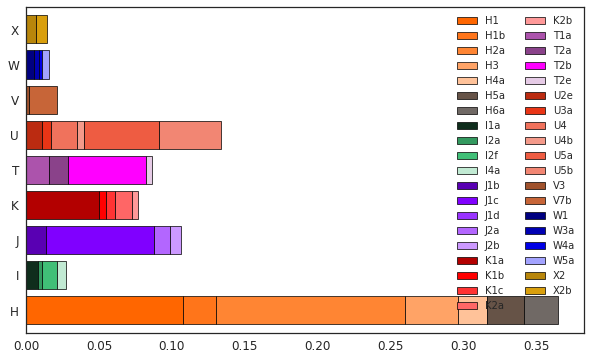

In [12]:
colormap = ListedColormap(haplo_cl_map)
ax = plt.figure(figsize=(10, 6)).add_subplot(111)
midlands.plot.barh(ax = ax,rot=0, stacked=True, cmap=colormap,width=0.8, linewidth=0.7, edgecolor='black',fontsize=12,legend=False)
#bars = ax.patches
#patterns = ["|",'*']*8 + ['\\','|']*8 + ['-','$']*8 + ['//']*8
#for bar,hatch in zip(bars,patterns):
#    print(hatch)
#    bar.set_hatch(hatch)
ax.set_yticklabels(midlands['Macrohaplo'])
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


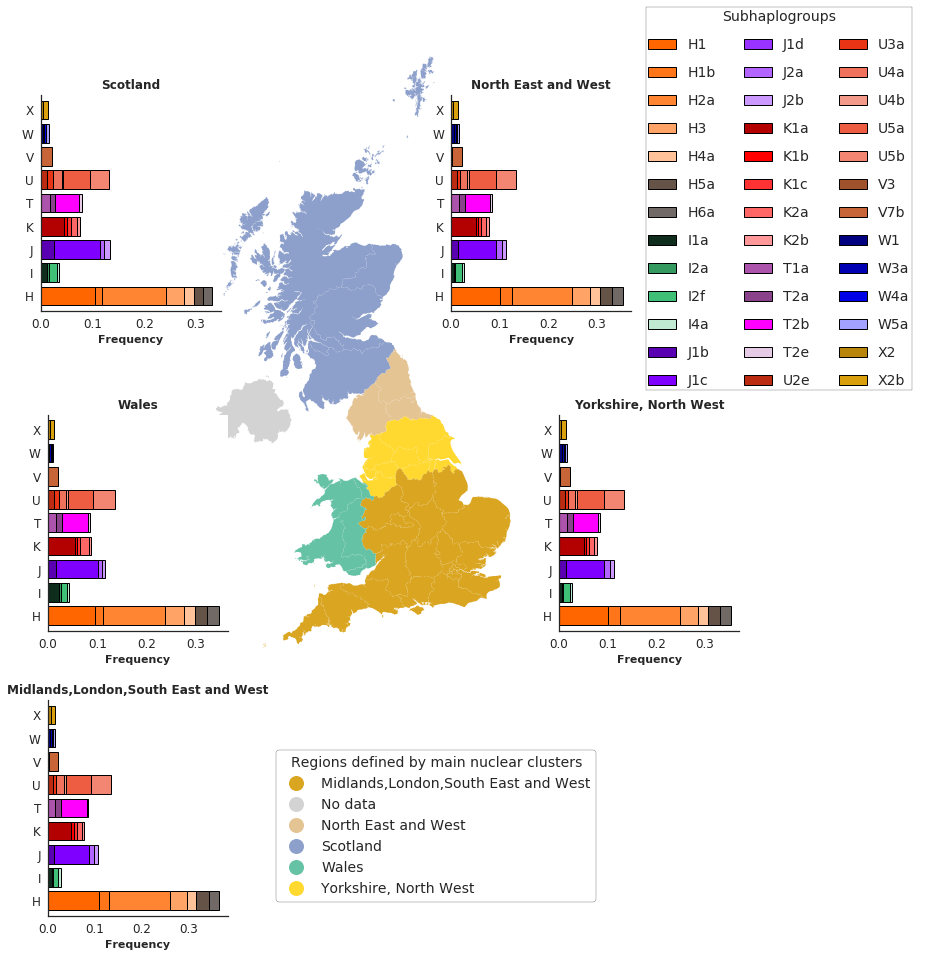

In [13]:
#MAP DARKER COLORS
from matplotlib.patches import ConnectionPatch
colors_ukmap = ['goldenrod','lightgrey','#e5c494','#8da0cb','#66c2a5','#ffd92f']
colormap_ukmap = ListedColormap(colors_ukmap)
dic_df = {'Midlands,London,South East and West':midlands,'Wales':wales,'Yorkshire, North West':yorkshire,'North East and West': north,'Scotland':scotland}
dic_clusters = {'Yorkshire, North West':[[0.8,0.18,0.25,0.25],'#e5c494'],
                'North East and West':[[0.65,0.55,0.25,0.25],'#8da0cb'],
                'Wales':[[0.09,0.18,0.25,0.25],'#66c2a5'],'Scotland':[[0.08,0.55,0.25,0.25],'#8da0cb'],'Midlands,London,South East and West':[[0.09,-0.15,0.25,0.25],'goldenrod']}

f,ax = plt.subplots(1, figsize=(10, 12))
merged.plot(column = 'NU_CL',ax = ax,cmap=colormap_ukmap, facecolor='white',edgecolor=None,linewidth=0.0000001,legend=True, legend_kwds={'title': 'Regions defined by main nuclear clusters','ncol':1,'markerscale':1.5,'fontsize': 14,'title_fontsize':14})
ax.axis('equal')
leg = ax.get_legend()
leg.set_frame_on(True)
leg.set_bbox_to_anchor((0.75, -0.3, 0.2, 0.2))
ax.set_axis_off()

for i in dic_df:
    tag = i
    df = dic_df[tag]
    #df.index = df.Haplogroup
    left,bottom,widt,heigth= dic_clusters[tag][0]
    ax2= f.add_axes([left,bottom,widt,heigth])
    #plot barplot and reference
    df.plot.barh(ax = ax2, stacked = True,cmap=colormap,figsize=(10,12),width= 0.8, linewidth=1,  edgecolor='black',fontsize=12, legend=False,title=tag)
    #ref_cluster.iloc[1:].plot.barh(ax = ax2,color='white',width= 0.3, position=0.5, linewidth=1, edgecolor='black',fontsize=12, legend=False)
    ax2.xaxis.set_label_text("Frequency",weight="bold")
    ax2.yaxis.set_label_text('')
    ax2.set_yticklabels(df['Macrohaplo'])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

#plot ref
#left,bottom,widt,heigth= ref_dic['Midlands,London,South East and West'][0]
#ax2= f.add_axes([left,bottom,widt,heigth])
#cluster_26_fraction.iloc[1:,:].plot.barh(ax = ax2,rot=0, stacked = True,linewidth=1, cmap=colormap_clusters,width= 0.5, edgecolor='black',fontsize=12, 

ax2.xaxis.set_label_text("Frequency",weight="bold")
ax2.yaxis.set_label_text("")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
##plot legend
handles = []
for i in haplo_colors:
	patch=mpatches.Patch(facecolor=haplo_colors[i],label=i,edgecolor='black',linewidth=1)
	handles.append(patch)
ax3 = f.add_axes([1.1,0.45,0.2,0.2])
ax3.legend(handles=handles,markerscale=1.5,borderpad=0.2,labelspacing=1,loc='lower right',
           fontsize=14,ncol=3,fancybox=False,shadow=False,frameon=True,title=r'Subhaplogroups',title_fontsize=14)
ax3.set_axis_off()


plt.savefig('UK_map_subhaplogroups.jpg',dpi=1000,bbox_inches='tight',format='jpg')


#MAP DARKER COLORS
plt.rcParams['patch.edgecolor']='black'
plt.rcParams['patch.linewidth']= 1
from matplotlib.patches import ConnectionPatch
colors_ukmap = ['goldenrod','lightgrey','#e5c494','#8da0cb','#66c2a5','#ffd92f']
colormap_ukmap = ListedColormap(colors_ukmap)
colors_clusters = ['#7fc97f','#beaed4','#fdc086','#ffff99','#f0027f','#666666','#386cb0','#bf5b17']
colormap_clusters = ListedColormap(colors_clusters)
dic_df = {'Wales':cluster_5_fraction,'Yorkshire, North West':cluster_236_fraction,'North East and West': cluster_268_fraction,'Scotland':cluster_78_fraction}
#dic_clusters = {'2':[['sandybrown','sandybrown','lavender'],[0.73,0.08,0.25,0.25], ["//"]*9+["////"]*9+[""]*9],'2/3':[['#F4D360','#F4D360','#F4D360','lavender'],[0.70,0.35,0.25,0.25], ["//"]*9+["\\\\"]*9+["////"]*9+[""]*9],'2/8':[['lightskyblue','lightskyblue','lightskyblue','lavender'],[0.65,0.63,0.25,0.25], ["//"]*9+["\\\\"]*9+["////"]*9+[""]*9],'5':[['turquoise','gainsboro','lavender'],[0.09,0.18,0.25,0.25], ["//"]*9+[""]*9+[""]*9],'7/8':[['gainsboro','plum','plum','lavender'],[0.08,0.55,0.25,0.25], [""]*9+["//"]*9+["////"]*9+[""]*9]}
dic_clusters = {'Yorkshire, North West':[[0.8,0.18,0.25,0.25],'#e5c494'],
                'North East and West':[[0.65,0.55,0.25,0.25],'#8da0cb'],
                'Wales':[[0.09,0.18,0.25,0.25],'#66c2a5'],'Scotland':[[0.08,0.55,0.25,0.25],'#8da0cb']}

ref_dic = {'Midlands,London,South East and West':[[0.09,-0.15,0.25,0.25],'goldenrod']}
f,ax = plt.subplots(1, figsize=(10, 12))
#ax = merged.plot(axes=ax)
merged.plot(column = 'NU_CL',ax = ax,cmap=colormap_ukmap, facecolor='white',edgecolor=None,linewidth=0.0000001,legend=True, legend_kwds={'title': 'Regions defined by main nuclear clusters','ncol':1,'markerscale':1.5,'fontsize': 14,'title_fontsize':14})
ax.axis('equal')
leg = ax.get_legend()
leg.set_frame_on(True)
leg.set_bbox_to_anchor((0.75, -0.3, 0.2, 0.2))
ax.set_axis_off()

for i in dic_df:
    tag = i
    df = dic_df[tag]
    #df.index = df.Haplogroup
    left,bottom,widt,heigth= dic_clusters[tag][0]
    ax2= f.add_axes([left,bottom,widt,heigth])
    #plot barplot and reference
    df.iloc[1:,:].plot.barh(ax = ax2, stacked = True,cmap=colormap_clusters,figsize=(10,12),width= 0.3, linewidth=1, position=-0.5,  edgecolor='black',fontsize=12, legend=False,title=tag)
    ref_cluster.iloc[1:].plot.barh(ax = ax2,color='powderblue',width= 0.3, position=0.5, linewidth=1, edgecolor='black',fontsize=12, legend=False)
    ax2.xaxis.set_label_text("Frequency",weight="bold")
    ax2.yaxis.set_label_text("")
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

#plot ref
left,bottom,widt,heigth= ref_dic['Midlands,London,South East and West'][0]
ax2= f.add_axes([left,bottom,widt,heigth])
cluster_26_fraction.iloc[1:,:].plot.barh(ax = ax2,rot=0, stacked = True,linewidth=1, cmap=colormap_clusters,width= 0.5, edgecolor='black',fontsize=12, 
                        legend=False,title='Midlands,London,South East and West')

ax2.xaxis.set_label_text("Frequency",weight="bold")
ax2.yaxis.set_label_text("")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
##plot legend
handles = []
for i in cluster_dict:
	patch=mpatches.Patch(color=cluster_dict[i],label=i,linestyle='-')
	handles.append(patch)
ax3 = f.add_axes([1.1,-0.10,0.2,0.2])
ax3.legend(handles=handles,edgecolor='black',markerscale=1.5,borderpad=0.2,labelspacing=1,loc='lower right',
           fontsize=14,ncol=3,fancybox=False,shadow=False,frameon=True,title='Nuclear clusters',title_fontsize=14)
ax3.set_axis_off()

#plt.savefig('UK_map_geopandas_darkercolors_notebook.pdf',dpi=300)
#plt.savefig('UK_map_geopandas_v3.tiff',dpi=300,bbox_inches='tight',format='tiff')
#plt.savefig('UK_map_geopandas_darkercolors.jpeg',dpi=500,bbox_inches='tight',format='jpeg')
plt.savefig('UK_map_geopandas_v3.png',dpi=1000,bbox_inches='tight',format='png')
#plt.savefig('UK_map_geopandas_darkercolors.pdf',bbox_inches='tight')
#plt.savefig('UK_map_geopandas_darkercolors.svg',format='svg',dpi=600)